# Homework 3: Regression Analysis using Python

Start Date: 10/18/2022, Due Date: 10/27/2022, by the midnight 11:59 EST

NOTE: There are always last minute issues submitting the projects. DO NOT WAIT UNTIL THE LAST MINUTE!



**Individual Assignment:** Please EDIT this cell and add your name
    
 Aninda Bimal Mandal

This homework will cover some of the basic ways to perform regression analysis on a dataset.

Tools and libraries that you may need: 
* Python3
* Pandas
* Numpy
* Scikit-learn (Used for sample data and regression algorithims)

 **NOTE**
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

### Problem 1 (50 Points): SImple Linear Regression  

Linear regression is used to fit a straight line or 'trendline' to two variables X and Y that are dependent on each other

In this problem we will be using a sample dataset that contains Boston House Pricing data, more details about the dataset please refer to: https://scikit-learn.org/stable/datasets/toy_dataset.html

To get started, we import house price data from sklearn datasets: 

In [150]:
import pandas as pd
import numpy as np
from sklearn import datasets
##import house price data from sklearn datasets
boston = datasets.load_boston()
#the data is imported as a json object by default
#to create a pandas dataframe from it we need to do the following

names = boston.feature_names #used to assign names to columns

bos = pd.DataFrame(boston.data) #import data into dataframe
bos.columns = names #assign column names 
bos.head() #display first five rows

/Users/aninda/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [151]:
target = boston.target  #this is price variable what we will be trying to predict
bos['PRICE'] = target  #create new column with target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(1) Let's perform a very simple regression on two variables. Please choose 'RM' vs 'PRICE' as feature and target, as these should be directly correlated. Please first create a scatter plot between 'RM' vs 'PRICE'. What did you find?

In [25]:
!pip3 install chart_studio
from chart_studio import plotly as py
#from chart_studio import plotly.plotly as plt

In [152]:
## Add your code here
import chart_studio.plotly as plt
import chart_studio as py
from plotly.offline import plot
py.tools.set_credentials_file(
    username='aninda20', api_key='x9NpNRkdU4iAKz1bQwjx')
import plotly.graph_objs as go

trace = go.Scatter(x=bos.RM, y=target, mode='markers')

plt.iplot([trace])


(2) To get good regression results, sometimes we need normalize the dataset first. Please perform data normalization to dataset `bos`. Hint: first remove column `PRICE` from the original dataset (the target does not need to be normalized, we only normalize features), then apply preprocessing.MinMaxScaler() function to all features to get normalized feature values). More details:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


In [153]:
## Add your code here
from sklearn import preprocessing
bos_new = bos
del bos_new['PRICE'] #Drop price variable from normalisation
val = bos_new.values
min_max_scaler = preprocessing.MinMaxScaler()
val_scaled = min_max_scaler.fit_transform(val)
bos_norm = pd.DataFrame(val_scaled,columns=bos.columns)
bos_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


(3) Split the normalized dataset into training and testing set (you can decide the testing set size/percentage). Train a simple linear regression model with `RM` as predictor and `PRICE` as target using the normalized training dataset, and test it on test dataset. Please print the actual price vs predicted price.

In [154]:
## Add your code here
from sklearn.model_selection import train_test_split
X= pd.DataFrame(bos_norm['RM'],columns=['RM'])
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

(3) Print the prediction accuracy (i.e., calculate the coefficient of determination $R^2$ by using LinearRegression().score() function) and mean squared error (MSE). What did you find?

In [155]:
## Add your code here
from sklearn import linear_model
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train) #Fit the model on the training data
#Actual vs predicted score
score = lr.score(X_test,y_test)
#Mean squared error
mseFull = np.mean((y_test - lr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.513277
Mean Squared Error: 48.520361


(4) Choose another feature on your own as the predictor, re-perform the simple linear regression process, and observe the prediction accuracy and mean squared error (i.e., repeat (2) and (3) above). What did you find? Is the accuracy higher? Can you analyze the reason?

In [156]:
boston1 = datasets.load_boston()
#the data is imported as a json object by default
#to create a pandas dataframe from it we need to do the following

names = boston.feature_names #used to assign names to columns

bos = pd.DataFrame(boston.data) #import data into dataframe
bos.columns = names #assign column names 
bos.head() #display first five rows

/Users/aninda/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [157]:
## Add your code here
target = boston.target  #this is price variable what we will be trying to predict
bos['PRICE'] = target  #create new column with target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [158]:
## Add your code here
trace = go.Scatter(x=bos.TAX, y=target, mode='markers')

plt.iplot([trace])

In [159]:
from sklearn import preprocessing
bos_new = bos
del bos_new['PRICE'] #Drop price variable from normalisation
val1 = bos_new.values
min_max_scaler = preprocessing.MinMaxScaler()
val_scaled = min_max_scaler.fit_transform(val)
bos_norm = pd.DataFrame(val_scaled,columns=bos.columns)
bos_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [160]:
## Add your code here
from sklearn.model_selection import train_test_split
X= pd.DataFrame(bos_norm['TAX'],columns=['TAX'])
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [161]:
## Add your code here
from sklearn import linear_model
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train) #Fit the model on the training data
#Actual vs predicted score
score = lr.score(X_test,y_test)
#Mean squared error
mseFull1 = np.mean((y_test - lr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)


Accuracy of model: 0.109173
Mean Squared Error: 48.520361


In [162]:
#accuracy of model is lower. This is because the correlation between tax and price is lesser than that of RM and price.
#This is also observed by comparing the two scatterplots.

### Problem 2 (50 Points): Multiple Linear Regression

A multiple linear regression is used to predict a target variable Y using two or more independent variables X1,X2,X3...

(1) Still use the previously normalized dataset to perform Multiple Linear Regression, randomly choose 3 features as predictors, and use `PRICE` as the target. Calculate accuracy and MSE. What did you find?


In [164]:
## Add your code here
X= bos_norm
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

(2) Perform Multiple Linear Regression, randomly choose 6 features as predictors, and use `PRICE` as the target. Calculate accuracy and MSE. What did you find?

In [165]:
## Add your code here
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [167]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [168]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [169]:
boston_df = pd.DataFrame(data = boston['data'], columns=boston['feature_names'])

In [170]:
boston_df['Price'] = boston['target']

In [ ]:
#Train Test Split

from sklearn.model_selection import train_test_split

In [171]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [174]:
X = boston_df[['CRIM', 'ZN', 'RM']]
y = boston_df["Price"]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [176]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [177]:
#checking intercept and coefficients
print(lm.intercept_)

-25.74797708272523


In [178]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-0.250842
ZN,0.052157
RM,7.688727


In [179]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Predictions vs Actual Values - Test Set')

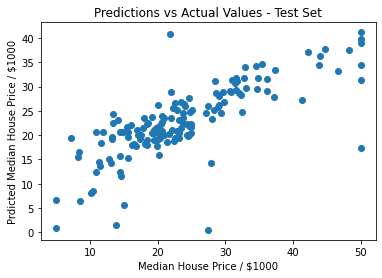

In [180]:
plt.scatter(y_test, predictions)
plt.xlabel("Median House Price / $1000")
plt.ylabel("Prdicted Median House Price / $1000")
plt.title("Predictions vs Actual Values - Test Set")

In [182]:

from sklearn import linear_model
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train) #Fit the model on the training data
#Actual vs predicted score
score = lr.score(X_test,y_test)
#Mean squared error
mseFull1 = np.mean((y_test - lr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)



Accuracy of model: 0.585479
Mean Squared Error: 48.520361


(3) Perform Multiple Linear Regression, use all features except `PRICE` as predictors, and use `PRICE` as the target. Calculate accuracy and MSE. What did you find?

In [183]:
## Add your code here
X = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = boston_df["Price"]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [185]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [186]:
#checking intercept and coefficients
print(lm.intercept_)

40.21892901255053


In [187]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-0.088505
ZN,0.050293
INDUS,0.020348
CHAS,3.754271
NOX,-17.748371
RM,3.247765
AGE,0.012001
DIS,-1.409161
RAD,0.263881
TAX,-0.010344


Text(0.5, 1.0, 'Predictions vs Actual Values - Test Set')

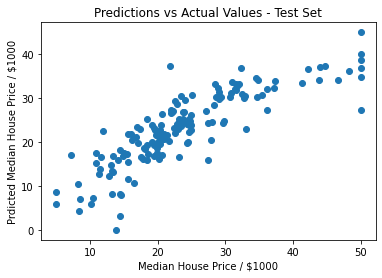

In [190]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("Median House Price / $1000")
plt.ylabel("Prdicted Median House Price / $1000")
plt.title("Predictions vs Actual Values - Test Set")

In [191]:

from sklearn import linear_model
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train) #Fit the model on the training data
#Actual vs predicted score
score = lr.score(X_test,y_test)
#Mean squared error
mseFull1 = np.mean((y_test - lr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)


Accuracy of model: 0.712396
Mean Squared Error: 48.520361


(4) Why do you get different performace when using different features? Write down your idea about this.

In [193]:
## Answer here
"""Usually, more variables we have the better the score
and so there is no need to remove certain ones to improve our model, at least where linear regression is concerned.
Thus, we get better performance (accuracy of 0.7123 for 6 variables) compared to 3 variables (accuracy of 0.585479).
However, this is not always true. We can do features selection using methods such as
1. Univariate Selection

2. Feature Importance

3.Correlation Matrix with Heatmap

We can also use a simple scatterplot to find out which feature variables are suitable. Using these techniques, 
we can improve our model.


"""

'Usually, more variables we have the better the score and so there is no need to remove certain ones to improve our model, at least where linear regression is concerned. Thus, we get better performance (accuracy of 0.7123 for 6 variables) compared to 3 variables (accuracy of 0.585479). However, this is not always true. We can do features selection using methods such as\n1. Univariate Selection\n2. Feature Importance\n3.Correlation Matrix with Heatmap\nWe can also use a simple scatterplot to find out which feature variables are suitable. Using these techniques,we can improve our model.\n\n'

# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the testing results are in the notebook. Please include all the output tables and figures in this file! 

# Grading Criteria:

**Total Points: 100**
        
    -----------------------------------
    Problem 1:
    Points: 50
    -----------------------------------
  
    -----------------------------------
    Problem 2:  
    Points: 50
    -----------------------------------


    ------------------------------